## IMPORTING DATA FROM LOCAL DRVE TO COLAB


In [0]:
from google.colab import files
uploaded = files.upload()

Saving cal_lamp_Anthony.txt to cal_lamp_Anthony.txt
Saving cal_lamp_Chibueze.txt to cal_lamp_Chibueze.txt
Saving Group12_cal.txt to Group12_cal.txt
Saving Group12_indark.txt to Group12_indark.txt
Saving Group12_sky.txt to Group12_sky.txt


#Importing packages

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

#Creating a plot of each dataset

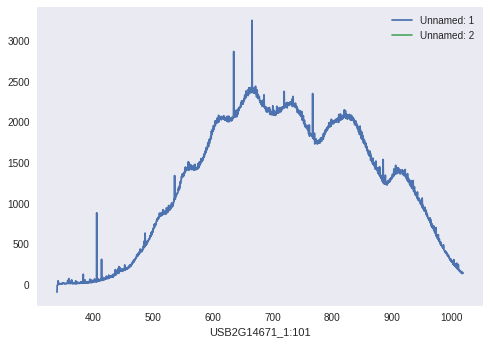

In [0]:
ca1 = pd.read_csv('Group12_cal.txt',delimiter = "\t")
ca1=ca1.set_index('USB2G14671_1:101')
cal=ca1.drop('Unnamed: 2',axis=1)
cal=cal.rename(columns={'Unnamed: 1':'Calibrated_Readings'})
ca1.plot()
plt.grid()

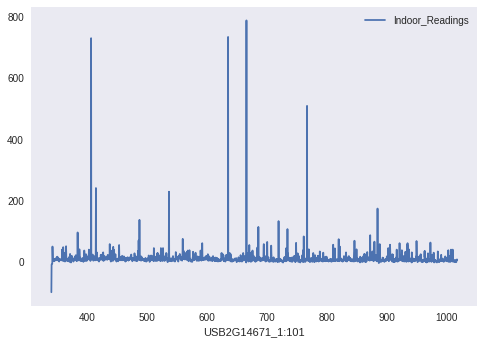

In [0]:
indark = pd.read_csv('Group12_indark.txt',delimiter = "\t")
indark=indark.set_index('USB2G14671_1:101')
indark=indark.drop('Unnamed: 2',axis=1)
indark=indark.rename(columns={'Unnamed: 1':'Indoor_Readings'})
indark.plot()
#figsize(15,4)
plt.grid()

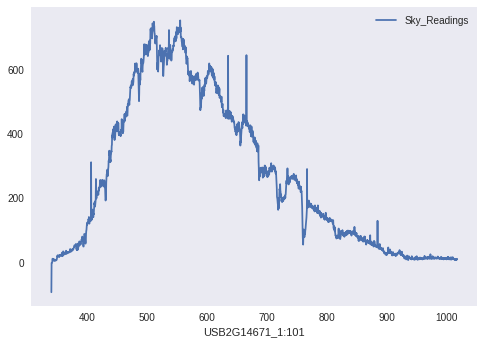

In [0]:
sky = pd.read_csv('Group12_sky.txt',delimiter = "\t")
sky=sky.set_index('USB2G14671_1:101')
sky=sky.drop('Unnamed: 2',axis=1)
sky=sky.rename(columns={'Unnamed: 1':'Sky_Readings'})
sky.plot()
#figsize(15,4)
plt.grid()

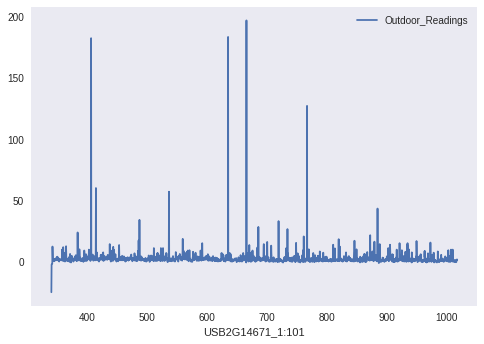

In [0]:

outdark= indark/4
outdark=outdark.rename(columns={'Indoor_Readings':'Outdoor_Readings'})
outdark.plot()
#figsize(15,4)
plt.grid()

# Step 1: Subtract the dark spectrum from the calibration spectrum you collected.
Divide each intensity value of the dark subtracted spectrum by the integration time. The resulting units are Counts ms-1.

In [0]:
Cal_Indark=pd.concat([cal,indark],axis=1)
Cal_Indark['Counts']=(Cal_Indark.Calibrated_Readings - Cal_Indark.Indoor_Readings)/800.0
Cal_Indark

,Calibrated_Readings,Indoor_Readings,Counts
USB2G14671_1:101,,,
339.887,-97.39,-99.17,0.002225
340.260,-11.39,-9.17,-0.002775
340.634,-10.39,-7.17,-0.004025
341.008,-8.39,-7.17,-0.001525
341.382,-9.39,-6.17,-0.004025
341.755,43.61,49.83,-0.007775
342.129,22.61,22.83,-0.000275
342.502,8.61,4.83,0.004725
342.876,6.61,2.83,0.004725


#Step 2: To convert counts/s to μW cm-2 μm-1 
Open the calibration file from the website - make sure you take the correct one. It contains the reference spectrum of the lamp in  μW cm-2 μm-1 At the same wavelength intervals as you measured.  Make sure the data starts and stops at the correct wavelengths.

In [0]:
cal_lamp = pd.read_csv('cal_lamp_Anthony.txt',sep='\s+',header=None)
cal_lamp = cal_lamp.set_index(0)
cal_lamp = cal_lamp.rename(columns={1:'Correct_Readings'})
cal_lamp

,Correct_Readings
0,
350.340,0.096388
350.713,0.097309
351.086,0.098231
351.459,0.099152
351.832,0.100073
352.204,0.100992
352.577,0.101914
352.950,0.102835
353.322,0.103754


# Step 3: To find the conversion factor CF 
CF= (Ref value of Irradiance/cal counts per second)  note that this should be done at each wavelength.  Or  Divide the provided reference spectrum of the lamp by the dark subtracted calibration spectrum from Step 2, making sure the wavelengths match. The result is a spectrum of calibration coefficients with units of μW cm-2 μm-1 Counts-1 ms.


In [0]:
Correct=pd.concat([Cal_Indark,cal_lamp],axis=1)
Correct['CF']=Correct.Correct_Readings/Correct.Counts
Correct.dropna()

,Calibrated_Readings,Indoor_Readings,Counts,Correct_Readings,CF
350.340,13.61,10.83,0.003475,0.096388,27.737516
350.713,11.61,4.83,0.008475,0.097309,11.481918
351.086,12.61,5.83,0.008475,0.098231,11.590632
351.459,13.61,4.83,0.010975,0.099152,9.034336
351.832,14.61,11.83,0.003475,0.100073,28.798007
352.204,7.61,7.83,-0.000275,0.100992,-367.243942
352.577,5.61,2.83,0.003475,0.101914,29.327703
352.950,2.61,0.83,0.002225,0.102835,46.218180
353.322,10.61,7.83,0.003475,0.103754,29.857364
353.695,10.61,5.83,0.005975,0.104676,17.518937


# Step 4: Subtract the dark spectrum outside from the sky spectrum.
Divide each intensity value of the dark subtracted spectrum by the integration time. The resulting units are Counts ms-1

In [0]:
Sky_Outdark=pd.concat([sky,outdark],axis=1)
Sky_Outdark['COUNTS']=(Sky_Outdark.Sky_Readings - Sky_Outdark.Outdoor_Readings)/40
Sky_Outdark

,Sky_Readings,Outdoor_Readings,COUNTS
USB2G14671_1:101,,,
339.887,-93.11,-24.7925,-1.707937
340.260,-2.11,-2.2925,0.004563
340.634,-2.11,-1.7925,-0.007937
341.008,-1.11,-1.7925,0.017062
341.382,0.89,-1.5425,0.060813
341.755,10.89,12.4575,-0.039187
342.129,10.89,5.7075,0.129563
342.502,6.89,1.2075,0.142062
342.876,5.89,0.7075,0.129562


#Step 5: Multiply the spectrum result from Step 4 by the calibration coefficient spectrum.
The result is the spectrum of the downwelling irradiance in units of μW cm-2 μm-1.

In [0]:
ALL=pd.concat([Correct,Sky_Outdark],axis=1)
ALL.dropna()

,Calibrated_Readings,Indoor_Readings,Counts,Correct_Readings,CF,Sky_Readings,Outdoor_Readings,COUNTS
USB2G14671_1:101,,,,,,,,
350.340,13.61,10.83,0.003475,0.096388,27.737516,16.89,2.7075,0.354563
350.713,11.61,4.83,0.008475,0.097309,11.481918,17.89,1.2075,0.417063
351.086,12.61,5.83,0.008475,0.098231,11.590632,21.89,1.4575,0.510813
351.459,13.61,4.83,0.010975,0.099152,9.034336,20.89,1.2075,0.492063
351.832,14.61,11.83,0.003475,0.100073,28.798007,19.89,2.9575,0.423313
352.204,7.61,7.83,-0.000275,0.100992,-367.243942,18.89,1.9575,0.423313
352.577,5.61,2.83,0.003475,0.101914,29.327703,17.89,0.7075,0.429563
352.950,2.61,0.83,0.002225,0.102835,46.218180,15.89,0.2075,0.392063
353.322,10.61,7.83,0.003475,0.103754,29.857364,19.89,1.9575,0.448313


In [0]:
ALL['downwelling']=ALL.CF * ALL.COUNTS
ALL.dropna()

,Calibrated_Readings,Indoor_Readings,Counts,Correct_Readings,CF,Sky_Readings,Outdoor_Readings,COUNTS,processed_output,downwelling
USB2G14671_1:101,,,,,,,,,,
350.340,13.61,10.83,0.003475,0.096388,27.737516,16.89,2.7075,0.354563,9.834683,9.834683
350.713,11.61,4.83,0.008475,0.097309,11.481918,17.89,1.2075,0.417063,4.788677,4.788677
351.086,12.61,5.83,0.008475,0.098231,11.590632,21.89,1.4575,0.510813,5.920640,5.920640
351.459,13.61,4.83,0.010975,0.099152,9.034336,20.89,1.2075,0.492063,4.445458,4.445458
351.832,14.61,11.83,0.003475,0.100073,28.798007,19.89,2.9575,0.423313,12.190556,12.190556
352.204,7.61,7.83,-0.000275,0.100992,-367.243942,18.89,1.9575,0.423313,-155.458951,-155.458951
352.577,5.61,2.83,0.003475,0.101914,29.327703,17.89,0.7075,0.429563,12.598081,12.598081
352.950,2.61,0.83,0.002225,0.102835,46.218180,15.89,0.2075,0.392063,18.120415,18.120415
353.322,10.61,7.83,0.003475,0.103754,29.857364,19.89,1.9575,0.448313,13.385430,13.385430


# Plot this final thing against wavelength to give the spectrum of the downwelling direct solar and sky irradiance

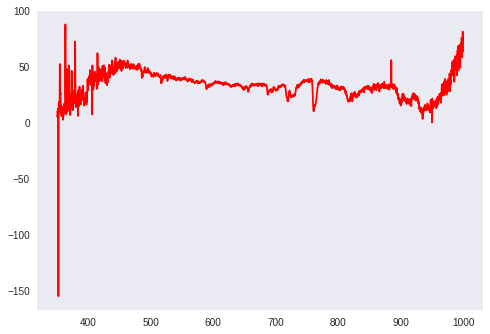

In [0]:
plt.plot(ALL.index,ALL.downwelling,color='red')
#figsize(10,4)
plt.grid()